In [62]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [28]:
df = pd.read_csv('data/Sales.csv')

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.isocalendar().week
df['WeekDay'] = df.Date.dt.day_name()


In [30]:
df.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Week,WeekDay
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,48,Tuesday
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,48,Thursday
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,12,Sunday


In [53]:
grp_weekday = df[['WeekDay', 'Profit']].groupby(['WeekDay'])
grp_age_group = df[['Age_Group', 'Profit']].groupby(['Age_Group'])

113036

In [58]:
grp_age_group.max()

,Profit
Age_Group,
Adults (35-64),15096
Seniors (64+),5638
Young Adults (25-34),5485
Youth (<25),5628


In [ ]:
""" def readable_numbers(x):
     Takes a large numbers and format it into K,M to make it more readable
    if x > 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

df['Profit'] = df['Profit'].apply(readable_numbers)
"""
 

In [46]:
group_country = df.groupby(['Country'])


In [60]:
group_country['Age_Group'].value_counts()

Country         Age_Group           
Australia       Adults (35-64)          10394
                Young Adults (25-34)     9102
                Youth (<25)              4382
                Seniors (64+)              58
Canada          Adults (35-64)           7158
                Young Adults (25-34)     4578
                Youth (<25)              2326
                Seniors (64+)             116
France          Adults (35-64)           4786
                Young Adults (25-34)     4552
                Youth (<25)              1590
                Seniors (64+)              70
Germany         Adults (35-64)           4868
                Young Adults (25-34)     4416
                Youth (<25)              1708
                Seniors (64+)             106
United Kingdom  Adults (35-64)           6658
                Young Adults (25-34)     4736
                Youth (<25)              2124
                Seniors (64+)             102
United States   Adults (35-64)          219

In [48]:
Weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

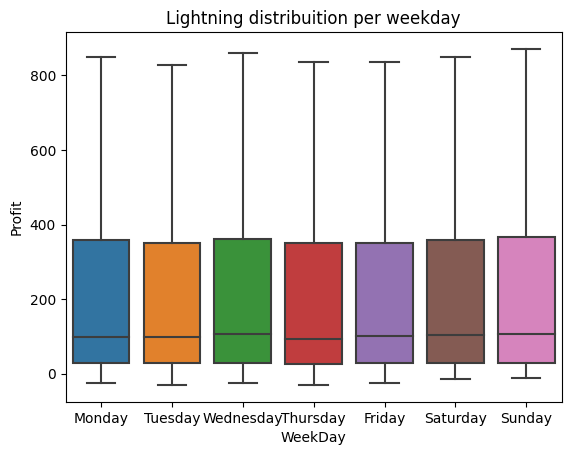

In [49]:
g = sns.boxplot(data=df,
                x= 'WeekDay',
                y= 'Profit',
                order= Weekday_order,
                showfliers= False)
g.set_title('Lightning distribuition per weekday');

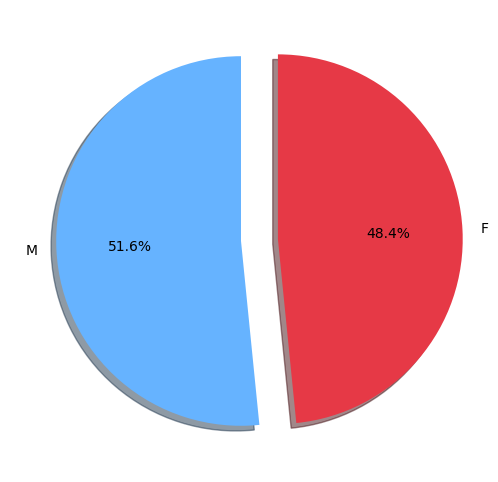

In [63]:
df_gender = df['Customer_Gender'].value_counts()

label = [df_gender.index.tolist()]
plt.pie(df_gender, labels=label[0], shadow=True, explode=(0.0, 0.2), colors=['#66b3ff','#E63946'], autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

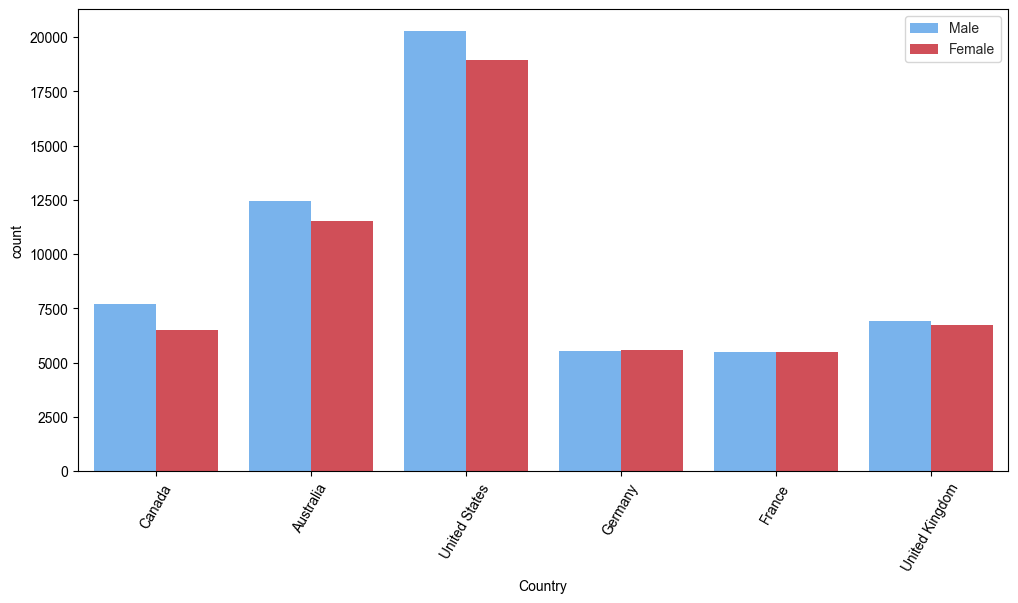

In [64]:
sns.countplot(data = df, x='Country', hue='Customer_Gender', palette=['#66b3ff','#E63946'])
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(12,6)
plt.show()

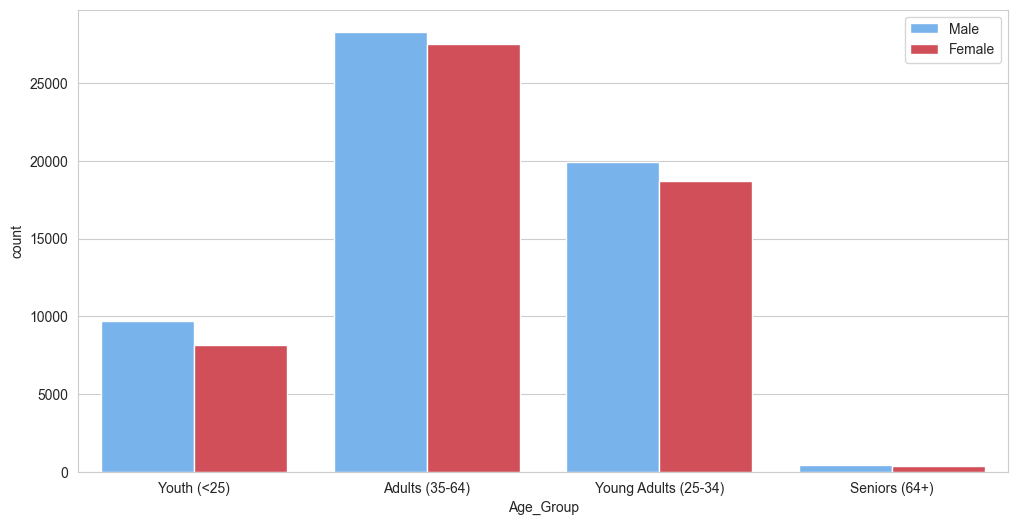

In [66]:
sns.countplot(data = df, x='Age_Group', hue='Customer_Gender', palette=['#66b3ff','#E63946'])
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(12,6)
plt.show()